# Using Logistic Regression for diabetes prediction

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np

#### Loading diabetes dataset

In [2]:
dataset = pd.read_csv('dataset/diabetes.csv')

In [3]:
dataset.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
dataset.shape

(768, 9)

#### Statistical measures of the dataset

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Check for missing values

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Target data

In [7]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Data interpretation

* 0 rep. *non-diabetic* patients
* 1 rep. *diabetic* patients

In [8]:
# mean value of "Outcome"
dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data visualization

In [72]:
# set default theme
sns.set_theme()

#### Pregnancies against Age

<Axes: xlabel='Age', ylabel='Pregnancies'>

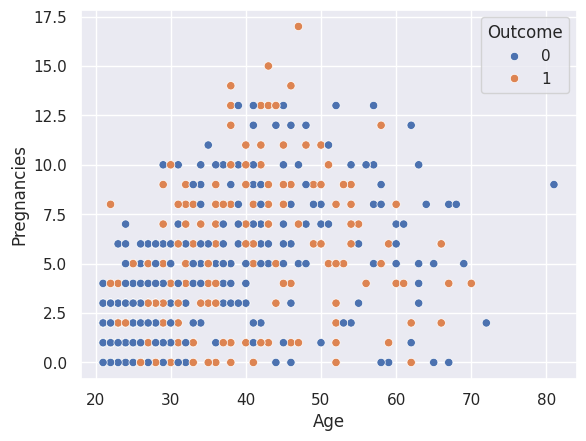

In [76]:
sns.scatterplot(data=dataset, x='Age', y='Pregnancies', hue='Outcome')

### Barchart

<Axes: xlabel='Pregnancies', ylabel='Age'>

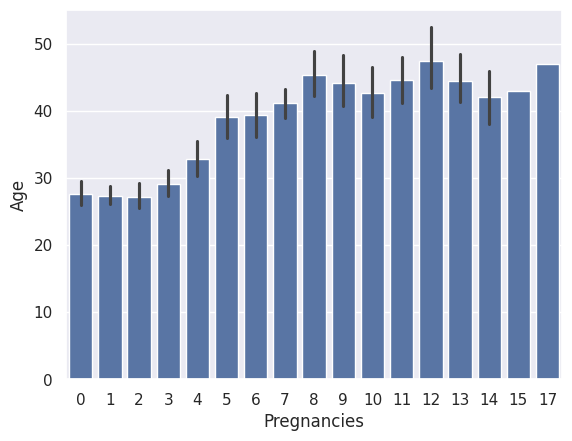

In [124]:
sns.barplot(data=dataset, x='Pregnancies', y='Age')

### Blood pressure against Age

<Axes: xlabel='Age', ylabel='BloodPressure'>

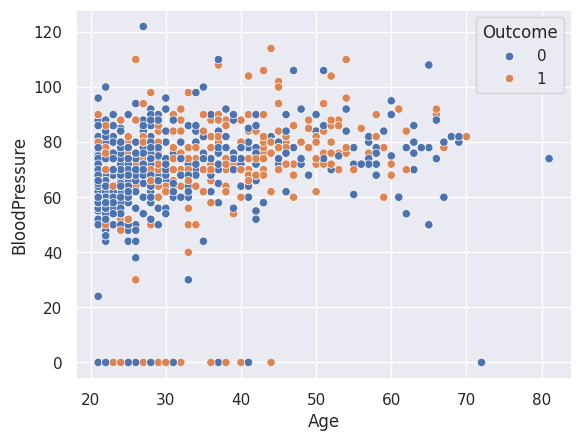

In [75]:
sns.scatterplot(data=dataset, x='Age', y='BloodPressure', hue='Outcome')

### Line chart

<Axes: xlabel='BloodPressure', ylabel='Age'>

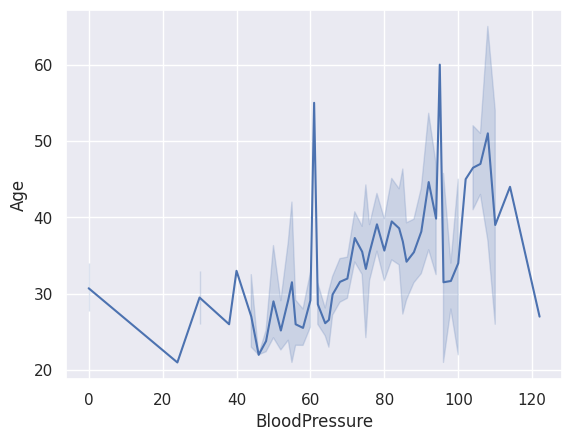

In [131]:
sns.lineplot(data=dataset, x='BloodPressure', y='Age')

### SkinThickness against Age

<Axes: xlabel='Age', ylabel='SkinThickness'>

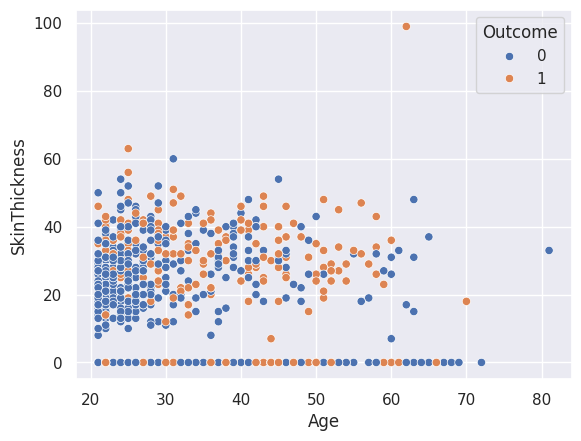

In [77]:
sns.scatterplot(data=dataset, x='Age', y='SkinThickness', hue='Outcome')

### Distribution chart

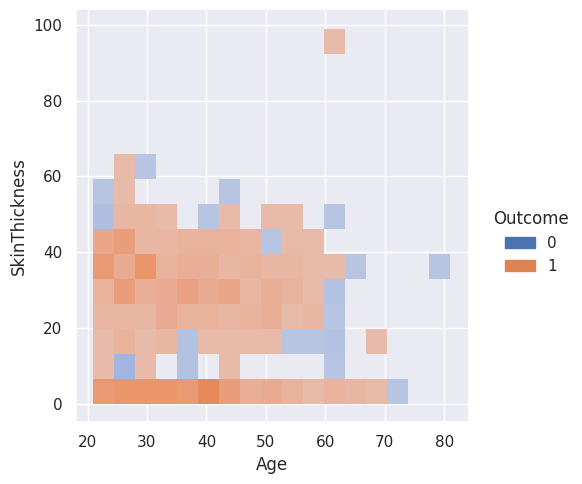

In [137]:
sns.displot(data=dataset, y='SkinThickness', x='Age', hue='Outcome')

### Insulin against Age

<Axes: xlabel='Age', ylabel='Insulin'>

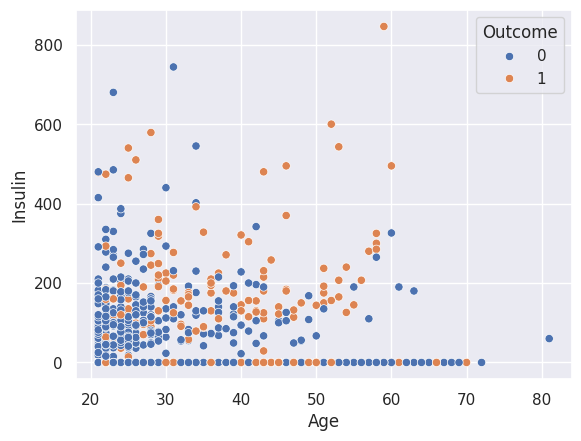

In [78]:
sns.scatterplot(data=dataset, x='Age', y='Insulin', hue='Outcome')

### Chart

<Axes: xlabel='Insulin', ylabel='Age'>

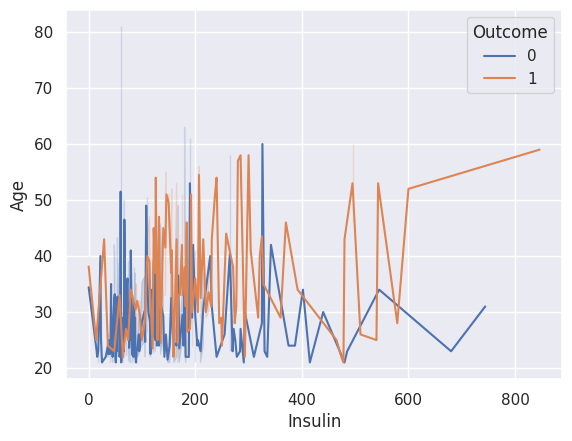

In [141]:
sns.lineplot(data=dataset, x='Insulin', y='Age', hue='Outcome')

### BMI against Age

<Axes: xlabel='Age', ylabel='BMI'>

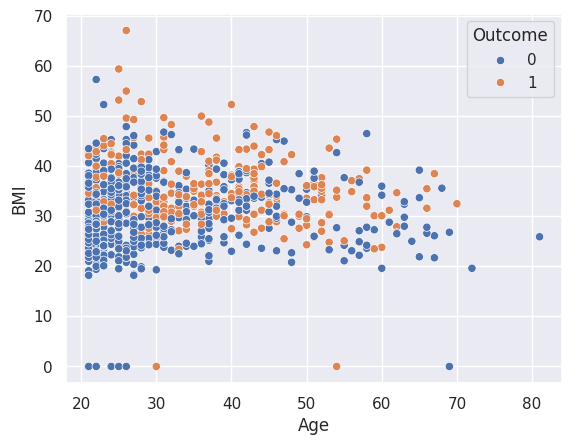

In [79]:
sns.scatterplot(data=dataset, x='Age', y='BMI', hue='Outcome')

### DiabetesPedigreeFunction against Age

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

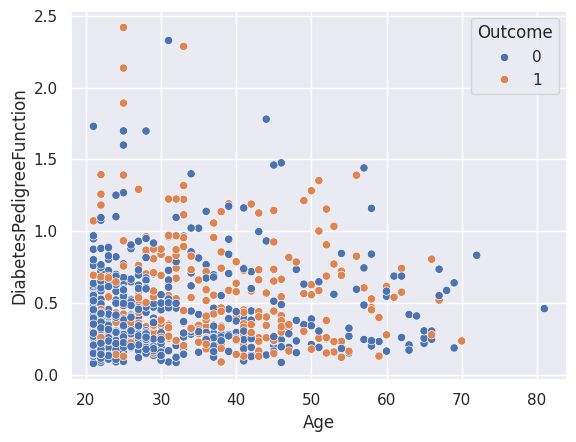

In [80]:
sns.scatterplot(data=dataset, x='Age', y='DiabetesPedigreeFunction', hue='Outcome')

### Separate features and target in the dataset

In [10]:
X = dataset.drop(columns="Outcome", axis=1)
Y = dataset["Outcome"]

In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Standardize the dataset
The data has to be standardized so that each feature name (i.e. column) has a uniform range of values.

In [13]:
scaler = StandardScaler()

In [14]:
std_data = scaler.fit_transform(X)  # std_data - standardized data

In [15]:
X = std_data
Y = dataset["Outcome"]

In [16]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Split data into training data and testing data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [19]:
print(X_train)

[[-1.14185152 -0.05929342 -3.57259724 ...  0.05170968 -0.9992857
  -0.78628618]
 [ 0.63994726 -0.49745345  0.04624525 ... -0.15136112 -1.05666795
   0.31985461]
 [-0.84488505  2.13150675 -0.47073225 ... -0.24020459 -0.2231152
   2.19178518]
 ...
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.04601433 -0.27837344  0.45982725 ...  0.94014439 -0.71237443
   0.40494237]
 [-1.14185152 -1.09209922 -0.05715025 ...  0.48323511 -0.70633419
  -0.70119842]]


In [20]:
print(X_test)

[[-0.25095213 -0.46615631  0.14964075 ... -0.78595734 -0.79995787
  -0.53102292]
 [-0.25095213 -0.24707629 -1.29789624 ... -1.21748278 -1.00230582
  -0.95646168]
 [ 0.3429808   0.81702665  0.45982725 ...  0.2167047  -0.76673656
   2.7023117 ]
 ...
 [-0.54791859 -0.34096773  0.25303625 ...  0.05170968  0.6829204
  -0.53102292]
 [-0.54791859 -1.24858494  0.14964075 ... -0.24020459  0.22688248
  -0.70119842]
 [ 2.7187125  -0.46615631  0.14964075 ...  0.58477051 -0.88754131
   1.00055664]]


### creating an instance of the model i.e. LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, Y_train)

LogisticRegression()

### Accuracy score for the dataset

In [23]:
# accuracy score - training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction) 

In [24]:
print(f'Accuracy score (training data): {training_data_accuracy}')

Accuracy score (training data): 0.7850162866449512


In [25]:
# accuracy score - testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print(f'Accuracy score (testing data): {testing_data_accuracy}')

Accuracy score (testing data): 0.7597402597402597


### Building a predictive system

In [27]:
input_data = (
    2,157,74,35,440,39.4,0.134,30
)

# convert input_data to a numpy array
input_data_array = np.asarray(input_data).reshape(1, -1)

std_input_data = scaler.transform(input_data_array)

prediction = model.predict(std_input_data)

if prediction[0] == 1:
    print("Patient is diabetic!")
else:
    print("Patient is healthy (non-diabetic).")

Patient is healthy (non-diabetic).


/home/brocode/Documents/Coding/Python/ml-projects/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
